<a href="https://colab.research.google.com/github/rpindoria/Analysis-of-datasets/blob/master/Bar_Chart_Of_Airport_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import matplotlib.pyplot as plt
import pandas as pd  # access a library of pandas functions

#to upload your dataset from my local drive to the notebook’s runtime. 
from google.colab import files
uploaded = files.upload()
#dataAirport = pd.read_csv("airport_data.csv")

Saving airport_data.csv to airport_data.csv


In [2]:

#Using pandas to store the uploaded csv file into a DataFrame.
import pandas as pd
import io
df = pd.read_csv(io.StringIO(uploaded['airport_data.csv'].decode('utf-8')))

print (df.columns)

# Question 1: 
# How many rows and columns do we have in our dataAirport dataframe?

print (df.shape)

Index(['rundate', 'reporting_period', 'foreign_region', 'foreign_country',
       'UK_airport', 'foreign_airport', 'this_month_total_pax',
       'this_month_schedueld_pax', 'this_month_charter_pax',
       'last_month_total_pax', 'last_month_scheduled_pax',
       'last_month_charter_pax', 'percent_change', 'Month', 'Year'],
      dtype='object')
(682, 15)


In [3]:
# Question 2:
# What are the column labels for the dataframe? 

print (df.columns)

Index(['rundate', 'reporting_period', 'foreign_region', 'foreign_country',
       'UK_airport', 'foreign_airport', 'this_month_total_pax',
       'this_month_schedueld_pax', 'this_month_charter_pax',
       'last_month_total_pax', 'last_month_scheduled_pax',
       'last_month_charter_pax', 'percent_change', 'Month', 'Year'],
      dtype='object')


In [0]:
# Question 3:
# What are the actual countries people are flying to?
#   - What happens if you take out the .unique() call?
#   - What happens if you remove the sorted() call? (remember both brackets!)

print (sorted((df['foreign_country'].unique())))

['AUSTRIA', 'BARBADOS', 'BELGIUM', 'BULGARIA', 'CANADA', 'CAPE VERDE ISLANDS', 'CROATIA', 'CUBA', 'CYPRUS', 'DENMARK', 'DOMINICAN REPUBLIC', 'EGYPT', 'FAROE ISLANDS', 'FINLAND', 'FRANCE', 'GERMANY', 'GREECE', 'HUNGARY', 'ICELAND', 'IRISH REPUBLIC', 'ITALY', 'KAZAKHSTAN', 'LUXEMBOURG', 'MACEDONIA', 'MALTA', 'MEXICO', 'MOROCCO', 'NETHERLANDS', 'NORWAY', 'OIL RIGS', 'POLAND', 'PORTUGAL(EXCLUDING MADEIRA)', 'PORTUGAL(MADEIRA)', 'REPUBLIC OF SERBIA', 'RUSSIA', 'SPAIN', 'SPAIN(CANARY ISLANDS)', 'SWEDEN', 'SWITZERLAND', 'TUNISIA', 'TURKEY', 'UKRAINE', 'UNITED ARAB EMIRATES', 'USA']


In [4]:
# Question 4:
# Which country is the most popular destination?
# Note we use idxmax() instead of max as this will return the 
# index of the maximum passenger number...

print (df.loc[df['this_month_total_pax'].idxmax()])

rundate                      20/11/2013 14:01
reporting_period                       201307
foreign_region              WESTERN EUROPE-EU
foreign_country                         SPAIN
UK_airport                            GLASGOW
foreign_airport             PALMA DE MALLORCA
this_month_total_pax                    44269
this_month_schedueld_pax                17669
this_month_charter_pax                  26600
last_month_total_pax                    41415
last_month_scheduled_pax                14212
last_month_charter_pax                  27203
percent_change                        6.89122
Month                                    July
Year                                     2013
Name: 363, dtype: object


Producing a bar chart
Now we want to examine how the number of passengers varies per month, independently of their particular destination. We need to merge together all the passengers for each month, across all the destinations. For this, we use the powerful Pandas groupby operation. This is like the GROUP BY Statement in SQL; it is used to arrange related data into groups - if a particular column has same values in different rows then it will arrange these rows in a group.

In [5]:
# group the data into 12 months
monthGroups = df.groupby('Month', sort=False, as_index=False)

# sum the passengers for each month
monthPassengers = monthGroups['this_month_total_pax'].sum()

print (monthPassengers)

   Month  this_month_total_pax
0   Janu                166783
1   Febr                154758
2   Marc                206648
3   Apri                248998
4    May                340629
5   June                446522
6   July                494974
7   Augu                427711
8   Sept                433741
9   Octo                380497
10  Nove                201924
11  Dece                190354


Now let's generate a bar chart from this data. The categorical variable (on the x-axis) is the month. The numerical variable (on the y axis) is the total number of passengers.

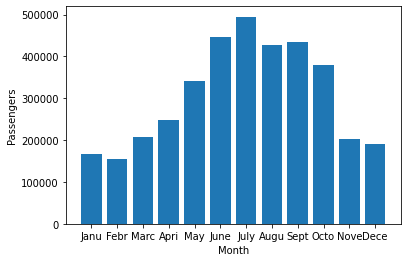

In [6]:
# first parameter is x-axis, second parameter is y-axis
plt.bar(monthPassengers['Month'], monthPassengers['this_month_total_pax'])

# add some labels to the graph
plt.xlabel('Month')
plt.ylabel('Passengers')

# display the graph
plt.show()